In [11]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read data
amz_prod = pd.read_csv('amazon_products.csv.gz', compression="gzip")
amz_cat = pd.read_csv('amazon_categories.csv.gz', compression="gzip")

### Amazon Products

In [13]:
# Load data
amz_prod.head(3)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300


In [14]:
# Amount of null value for each columns
amz_prod.isnull().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [15]:
amz_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


In [16]:
# Drop image url column
amz_prod.drop(columns='imgUrl', axis=1, inplace=True)

In [17]:
# Check data duplicate
amz_prod[amz_prod.duplicated()]

,asin,title,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth


In [18]:
amz_prod.columns

Index(['asin', 'title', 'productURL', 'stars', 'reviews', 'price', 'listPrice',
       'category_id', 'isBestSeller', 'boughtInLastMonth'],
      dtype='object')

In [19]:
# Rename columns
new_cols_name = {
    'productURL' : 'product_url',
    'listPrice' : 'list_price',
    'isBestSeller' : 'is_best_seller',
    'boughtInLastMonth' : 'bought_in_last_month'
}

amz_prod = amz_prod.rename(new_cols_name, axis=1)

In [20]:
# Statistical descriptive
amz_prod.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,1426337,1426337,B07GH67QC8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,1426336,1385430,Men's Sneaker,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_url,1426337,1426337,https://www.amazon.com/dp/B07GH67QC8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stars,1426337.0,NaN,NaN,NaN,3.999512,1.344292,0.0,4.1,4.4,4.6,5.0
reviews,1426337.0,NaN,NaN,NaN,180.75082,1761.452959,0.0,0.0,0.0,0.0,346563.0
price,1426337.0,NaN,NaN,NaN,43.375404,130.289296,0.0,11.99,19.95,35.99,19731.81
list_price,1426337.0,NaN,NaN,NaN,12.44916,46.111984,0.0,0.0,0.0,0.0,999.99
category_id,1426337.0,NaN,NaN,NaN,123.740881,73.112735,1.0,65.0,120.0,176.0,270.0
is_best_seller,1426337,2,False,1417817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bought_in_last_month,1426337.0,NaN,NaN,NaN,141.982295,836.271965,0.0,0.0,0.0,50.0,100000.0


In [21]:
# Separate products with discounts
amz_prod_nodisc = amz_prod[amz_prod["list_price"] == 0]
amz_prod_disc = amz_prod[amz_prod["list_price"] != 0]

In [22]:
# Make discount column
amz_prod_nodisc[ "discount"] = 0
amz_prod_disc["discount"] = amz_prod_disc["list_price"] - amz_prod_disc["price"]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2652\4156436497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amz_prod_nodisc[ "discount"] = 0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2652\4156436497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amz_prod_disc["discount"] = amz_prod_disc["list_price"] - amz_prod_disc["price"]


In [23]:
# Concatenate discount and no discount dataframe
amz_prod = pd.concat([amz_prod_nodisc, amz_prod_disc], ignore_index=True)

In [24]:
# Drop list price column
amz_prod = amz_prod.drop(columns="list_price", axis=1)

In [25]:
amz_prod.shape

(1426337, 10)

In [26]:
amz_prod.head(3)

,asin,title,product_url,stars,reviews,price,category_id,is_best_seller,bought_in_last_month,discount
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,104,False,2000,0.0
1,B07XSCD2R4,Maxlite 5 Softside Expandable Luggage with 4 S...,https://www.amazon.com/dp/B07XSCD2R4,4.5,0,144.49,104,False,500,0.0
2,B07MXF4G8K,"Hard Shell Carry on Luggage Airline Approved, ...",https://www.amazon.com/dp/B07MXF4G8K,4.5,0,169.99,104,False,400,0.0


### Amazon Categories

In [27]:
amz_cat.head(3)

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies


In [28]:
amz_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             248 non-null    int64 
 1   category_name  248 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [29]:
amz_cat["category_name"].unique().shape

(248,)

### Join amazon products with categories

In [30]:
# Merge amazon products and amazon categories
amz = pd.merge(amz_prod, amz_cat, left_on="category_id", right_on="id")

In [31]:
amz.columns

Index(['asin', 'title', 'product_url', 'stars', 'reviews', 'price',
       'category_id', 'is_best_seller', 'bought_in_last_month', 'discount',
       'id', 'category_name'],
      dtype='object')

In [32]:
# Drop category id and id columns
amz = amz.drop(columns=["category_id", "id"], axis=1)

In [33]:
# Rearrange columns order
amz = amz[['asin', 'title', 'product_url', 'category_name', 'stars', 'reviews', 'price', 'discount', 'is_best_seller', 'bought_in_last_month']]

In [34]:
amz.head(3)

,asin,title,product_url,category_name,stars,reviews,price,discount,is_best_seller,bought_in_last_month
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://www.amazon.com/dp/B014TMV5YE,Suitcases,4.5,0,139.99,0.0,False,2000
1,B07XSCD2R4,Maxlite 5 Softside Expandable Luggage with 4 S...,https://www.amazon.com/dp/B07XSCD2R4,Suitcases,4.5,0,144.49,0.0,False,500
2,B07MXF4G8K,"Hard Shell Carry on Luggage Airline Approved, ...",https://www.amazon.com/dp/B07MXF4G8K,Suitcases,4.5,0,169.99,0.0,False,400


## Export Data

In [35]:
# Export dataframe to csv file
amz.to_csv("amazon.csv.gz", index=False, compression="gzip")

## Answer the question

The percentage of amazon products with more than 4.7 stars is 14.05%
The percentage of amazon products with less than equal 4.7 stars is 85.95%


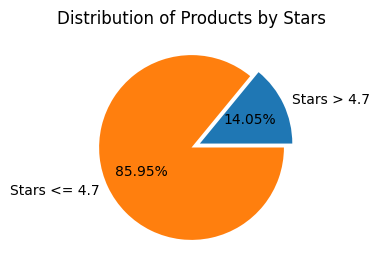

In [36]:
# 1. How many percentage of amazon products have stars above 4.7?

pct_gt47 = round((amz[amz["stars"] > 4.7].shape[0]/amz.shape[0])*100, 2)
print(f"The percentage of amazon products with more than 4.7 stars is {pct_gt47}%")

pct_lte47 = round((amz[amz["stars"] <= 4.7].shape[0]/amz.shape[0])*100, 2)
print(f"The percentage of amazon products with less than equal 4.7 stars is {pct_lte47}%")

plt.figure(figsize=(4,3))
plt.pie(x=[pct_gt47, pct_lte47], labels=['Stars > 4.7', 'Stars <= 4.7'], explode=[0.1, 0], autopct='%.2f%%')
plt.title('Distribution of Products by Stars')
plt.show()

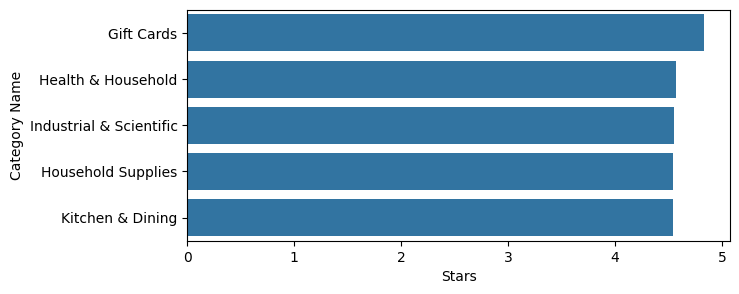

In [37]:
# 2. Top 5 categories based on highest average stars

top5_h_avg_stars = amz.groupby(by=["category_name"], as_index=False)["stars"].mean() \
                    .sort_values(by='stars', ascending=False).head()
                    
plt.figure(figsize=(7,3))
sns.barplot(data=top5_h_avg_stars,
            y=top5_h_avg_stars.category_name,
            x=top5_h_avg_stars.stars)
plt.ylabel('Category Name')
plt.xlabel('Stars')
plt.show()

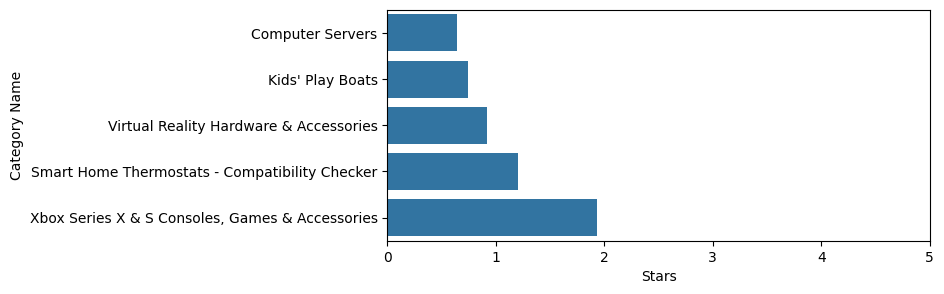

In [38]:
# 3. Top 5 categories based on lowest average stars

top5_l_avg_stars = amz.groupby(by=["category_name"], as_index=False)["stars"].mean() \
                    .sort_values(by='stars', ascending=True).head()

plt.figure(figsize=(7,3))
sns.barplot(data=top5_h_avg_stars,
            y=top5_l_avg_stars.category_name,
            x=top5_l_avg_stars.stars)
plt.ylabel('Category Name')
plt.xlabel('Stars')
plt.xlim(0,5)
plt.show()

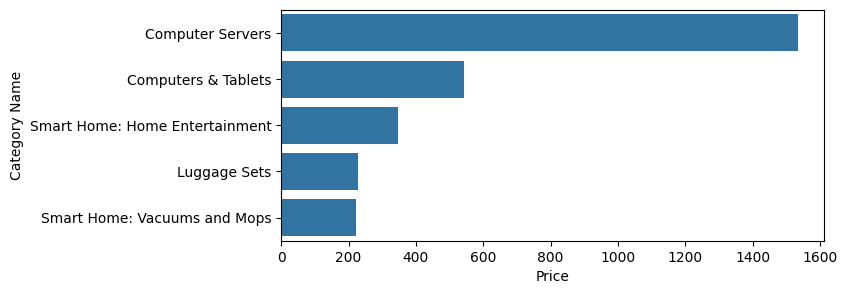

In [39]:
# 4. Top 5 categories based on highest average price

top5_h_avg_price = amz.groupby(by=["category_name"], as_index=False)["price"].mean() \
                    .sort_values(by='price', ascending=False).head()

plt.figure(figsize=(7,3))
sns.barplot(data=top5_h_avg_price,
            y=top5_h_avg_price.category_name,
            x=top5_h_avg_price.price)
plt.ylabel('Category Name')
plt.xlabel('Price')
plt.show()

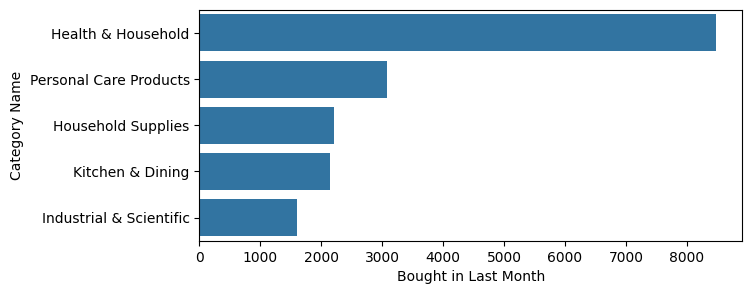

In [40]:
# 5. Top 5 categories based on average products purchased in the last month

top5_h_avg_bought = amz.groupby(by=["category_name"], as_index=False)["bought_in_last_month"].mean() \
                    .sort_values(by='bought_in_last_month', ascending=False).head()

plt.figure(figsize=(7,3))
sns.barplot(data=top5_h_avg_bought,
            y=top5_h_avg_bought.category_name,
            x=top5_h_avg_bought.bought_in_last_month)
plt.ylabel('Category Name')
plt.xlabel('Bought in Last Month')
plt.show()

In [41]:
# products with Health & Household category

amz[amz["category_name"] == "Health & Household"].sort_values(by="bought_in_last_month", ascending=False).head()

,asin,title,product_url,category_name,stars,reviews,price,discount,is_best_seller,bought_in_last_month
275678,B01M4MCUAF,TruSkin Vitamin C Serum for Face – Anti Aging ...,https://www.amazon.com/dp/B01M4MCUAF,Health & Household,4.3,0,0.00,0.00,False,30000
1170558,B0BVBYQGTW,Dove Body Wash with Pump Sensitive Skin 3 Coun...,https://www.amazon.com/dp/B0BVBYQGTW,Health & Household,4.8,0,23.22,6.75,False,30000
275685,B07FL53JJ7,"Dr Teal's Pure Epsom Salt Soak, Fragrance Free...",https://www.amazon.com/dp/B07FL53JJ7,Health & Household,4.8,0,4.97,0.00,False,20000
275686,B003EMNITQ,Gillette Venus ComfortGlide Womens Razor Blade...,https://www.amazon.com/dp/B003EMNITQ,Health & Household,4.8,0,21.97,0.00,True,20000
275687,B089WRB791,"Amazon Basics Original Fresh Liquid Hand Soap,...",https://www.amazon.com/dp/B089WRB791,Health & Household,4.5,0,6.85,0.00,False,20000


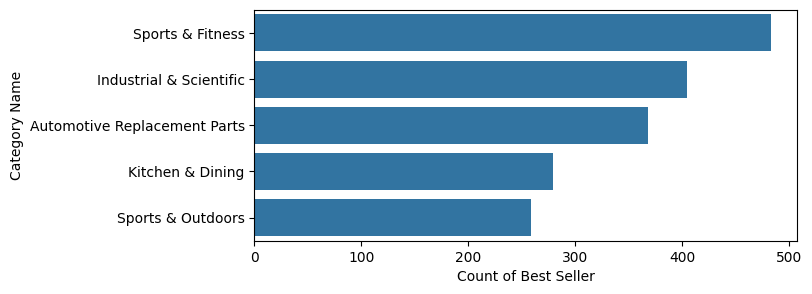

In [42]:
# 6. What is the category with the most best sellers?

top5_best_seller = amz[amz["is_best_seller"]==True].groupby(by=["category_name"], as_index=False)["is_best_seller"].count() \
                    .sort_values(by='is_best_seller', ascending=False).head()

plt.figure(figsize=(7,3))
sns.barplot(data=top5_best_seller,
            y=top5_best_seller.category_name,
            x=top5_best_seller.is_best_seller)
plt.ylabel('Category Name')
plt.xlabel('Count of Best Seller')
plt.show()

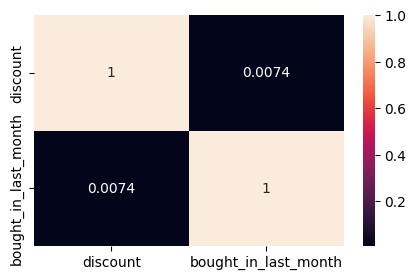

In [43]:
# 7. How does the discount correlate with the last month purchased?

corr_disc_bought = amz[["discount", "bought_in_last_month"]].corr()

plt.figure(figsize=(5,3))
sns.heatmap(corr_disc_bought, annot=True)
plt.show()

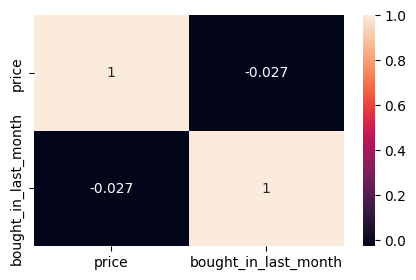

In [44]:
# 8. How does the price correlate with the last month purchased?

corr_price_bought = amz[["price", "bought_in_last_month"]].corr()

plt.figure(figsize=(5,3))
sns.heatmap(corr_price_bought, annot=True)
plt.show()

In [45]:
# 9. What were the 5 most purchased products in the last month?

amz[amz["bought_in_last_month"] ==  amz.bought_in_last_month.max()]

,asin,title,product_url,category_name,stars,reviews,price,discount,is_best_seller,bought_in_last_month
250490,B07MHJFRBJ,"Bounty Quick Size Paper Towels, White, 8 Famil...",https://www.amazon.com/dp/B07MHJFRBJ,Household Cleaning Supplies,4.8,0,24.42,0.00,True,100000
250491,B074CR89QG,Amazon Brand - Presto! Flex-a-Size Paper Towel...,https://www.amazon.com/dp/B074CR89QG,Household Cleaning Supplies,4.7,0,28.28,0.00,False,100000
250493,B09BWFX1L6,"Amazon Basics 2-Ply Paper Towels, Flex-Sheets,...",https://www.amazon.com/dp/B09BWFX1L6,Household Cleaning Supplies,4.2,0,22.86,0.00,False,100000
765994,B084HQ4DYQ,LMNT Zero-Sugar Electrolytes - Variety Salt - ...,https://www.amazon.com/dp/B084HQ4DYQ,Sports Nutrition Products,4.5,0,25.00,0.00,False,100000
771791,B01N05APQY,"Nespresso Capsules VertuoLine, Medium and Dark...",https://www.amazon.com/dp/B01N05APQY,Kitchen & Dining,4.8,0,37.50,0.00,False,100000
811254,B00T0C9XRK,essence | Lash Princess False Lash Effect Masc...,https://www.amazon.com/dp/B00T0C9XRK,Makeup,4.3,346563,4.99,0.00,True,100000
926801,B074PVTPBW,Mighty Patch Original from Hero Cosmetics - Hy...,https://www.amazon.com/dp/B074PVTPBW,Personal Care Products,4.5,0,11.97,0.00,True,100000
1161049,B00DU5SRIY,Stardrops - The Pink Stuff - The Miracle All P...,https://www.amazon.com/dp/B00DU5SRIY,Household Cleaning Supplies,4.4,0,4.99,0.98,True,100000
1198206,B09LH36816,"Hismile v34 Colour Corrector, Tooth Stain Remo...",https://www.amazon.com/dp/B09LH36816,Oral Care Products,3.4,0,20.69,8.31,True,100000
1325277,B0748J34WZ,"Dixie Paper Plates, 8 1/2 inch, Dinner Size Pr...",https://www.amazon.com/dp/B0748J34WZ,Kitchen & Dining,4.8,0,5.99,0.90,True,100000


The percentage of amazon best seller products is 0.6%
The percentage of amazon not best seller products is 99.4%


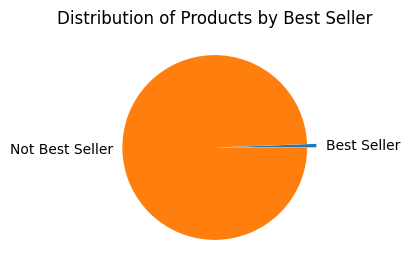

In [46]:
# 10. What is the percentage of best seller products?

pct_bs = round((amz[amz["is_best_seller"] == True].shape[0]/amz.shape[0])*100, 2)
print(f"The percentage of amazon best seller products is {pct_bs}%")

pct_nbs = round((amz[amz["is_best_seller"] == False].shape[0]/amz.shape[0])*100, 2)
print(f"The percentage of amazon not best seller products is {pct_nbs}%")

plt.figure(figsize=(4,3))
plt.pie(x=[pct_bs, pct_nbs], labels=['Best Seller', 'Not Best Seller'], explode=[0.1, 0])
plt.title('Distribution of Products by Best Seller')
plt.show()

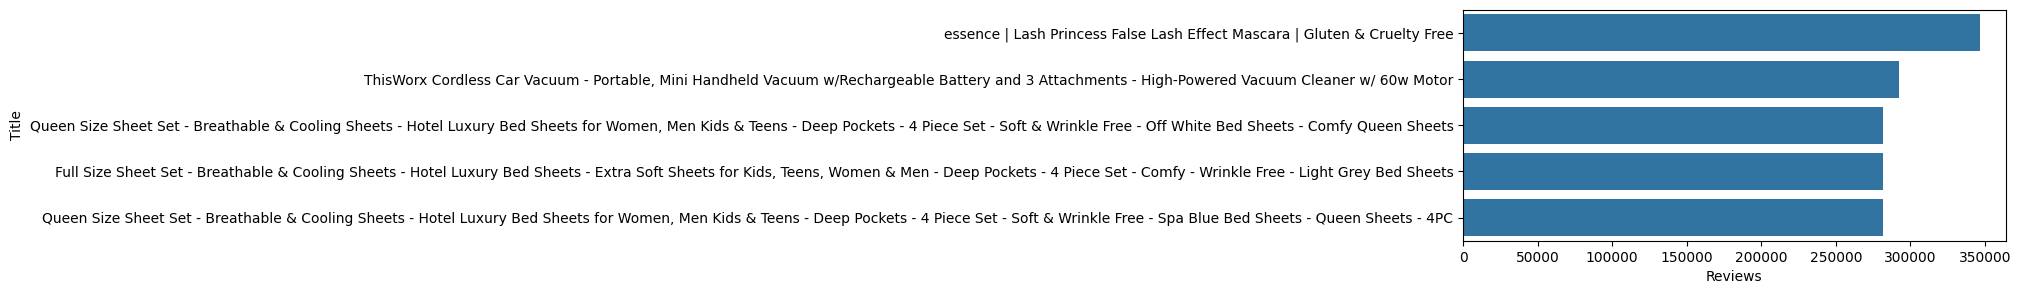

In [47]:
# 11. Top 5 products have the highest reviews

top5_h_reviews = amz.sort_values(by="reviews", ascending=False).head()

plt.figure(figsize=(7,3))
sns.barplot(data=top5_h_reviews,
            y=top5_h_reviews.title,
            x=top5_h_reviews.reviews)
plt.ylabel('Title')
plt.xlabel('Reviews')
plt.show()

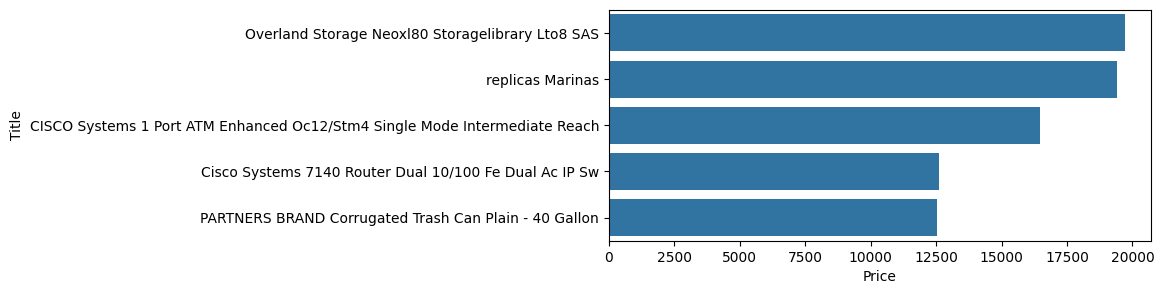

In [48]:
# 12. Top 5 products have the highest price

top5_h_price = amz.sort_values(by="price", ascending=False).head()

plt.figure(figsize=(7,3))
sns.barplot(data=top5_h_price,
            y=top5_h_price.title,
            x=top5_h_price.price)
plt.ylabel('Title')
plt.xlabel('Price')
plt.show()

In [49]:
amz[amz["bought_in_last_month"] ==  0].groupby(by="category_name")["bought_in_last_month"].count() \
                                        .sort_values(ascending=False).head()

category_name
Girls' Clothing     25889
Boys' Clothing      22245
Men's Shoes         17676
Girls' Jewelry      16696
Women's Handbags    15613
Name: bought_in_last_month, dtype: int64

In [50]:
amz['category_name'].value_counts()

category_name
Girls' Clothing                                   28619
Boys' Clothing                                    24660
Toys & Games                                      20846
Men's Shoes                                       19822
Women's Handbags                                  18994
                                                  ...  
Smart Home: Lawn and Garden                          76
Smart Home: Voice Assistants and Hubs                50
Smart Home: New Smart Devices                        42
Garment Bags                                         40
Smart Home Thermostats - Compatibility Checker       22
Name: count, Length: 248, dtype: int64

In [51]:
# 13. How many percentage of amazon products have stars under 3?

pct_lt3 = round((amz[amz["stars"] < 3].shape[0]/amz.shape[0])*100, 2)
print(f"The percentage of amazon products with less than 3 stars is {pct_lt3}%")

The percentage of amazon products with less than 3 stars is 10.27%
